i 0 source Hydroelectric
i 1 source Wind
i 2 source Biomass
i 3 source Photovoltais


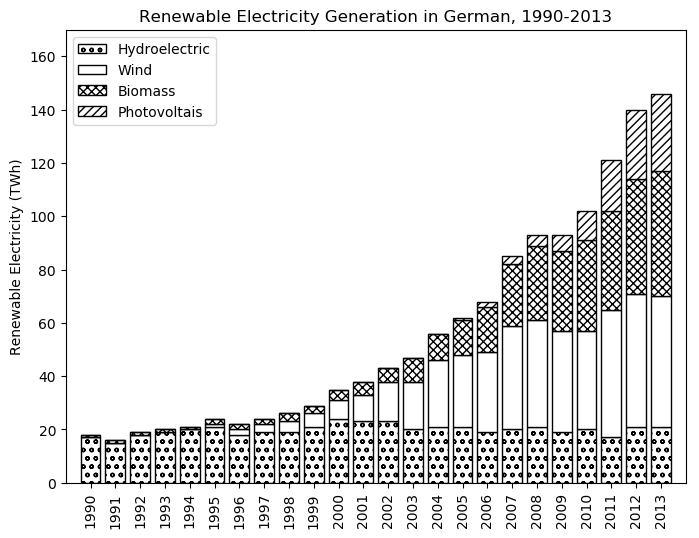

In [25]:
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt

url='https://scipython.com/static/media/examples/E7/germany-energy-sources.txt'
file = urlopen(url)
data = np.loadtxt(file, skiprows=2, dtype='i4')
# print(data)
years = data[:,0]
n = len(years)

#GWh to TWh
data[:,1:]=data[:,1:]/1000
# print(data)

fig=plt.figure(figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
ax=fig.add_subplot(111)
sources=('Hydroelectric','Wind','Biomass','Photovoltais')
hatch=['oo',' ','xxxx','////']
bottom = np.zeros(n)
bars=[None]*n
for i, source in enumerate(sources):
    print('i',i,'source',source)
    bars[i]=ax.bar(years, bottom=bottom, height=data[:,i+1],color='w', edgecolor ='k',
                   hatch=hatch[i], lw=1., align='center')
    bottom += data[:,i+1]
    
ax.set_xticks(years)
plt.xticks(rotation = 90)
ax.set_xlim(years[-1]-1, years[0]+1)
ax.set_ylim(0, 170)
ax.set_ylabel('Renewable Electricity (TWh)')
ax.set_title('Renewable Electricity Generation in German, {}-{}'.format(years[-1],years[0]))
plt.legend(bars, sources, loc='best')
plt.show()

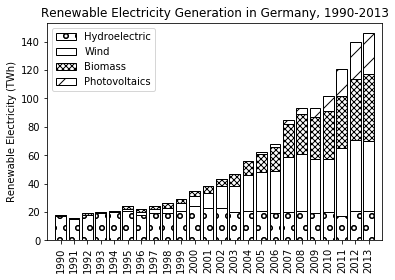

In [11]:
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt

url='https://scipython.com/static/media/examples/E7/germany-energy-sources.txt'
file = urlopen(url)
data = np.loadtxt(file, skiprows=2, dtype='i4')
# print(data)
years = data[:,0]
n = len(years)

# GWh to TWh
data[:,1:] = data[:,1:]/1000

fig = plt.figure()
ax = fig.add_subplot(111)
sources = ('Hydroelectric', 'Wind', 'Biomass', 'Photovoltaics')
hatch = ['o', '', 'xxxx', '/']
bottom = np.zeros(n)
bars = [None]*n
for i, source in enumerate(sources):
    bars[i] = ax.bar(years, bottom=bottom, height=data[:,i+1], color='w', 
                    hatch=hatch[i], align='center')
    bottom += data[:,i+1]

ax.set_xticks(years)
plt.xticks(rotation=90)
ax.set_xlim(1989, 2014)
ax.set_ylabel('Renewable Electricity (TWh)')
ax.set_title('Renewable Electricity Generation in Germany, 1990-2013')
plt.legend(bars, sources, loc='best')
plt.show()

In [22]:
import sys
print(sys.version)

3.6.3 |Anaconda custom (64-bit)| (default, Oct 13 2017, 12:02:49) 
[GCC 7.2.0]


In [6]:
x=1
x += 1
print(x)

2
